Initial Data Overview:
    a_time    a_amp     b_time    b_amp  OP_s_Amp  OP_s_Time   age  sex
0  11.3909 -5.23289  29.126900  16.7272       NaN        NaN  14.5    0
1  11.3463 -3.98402  29.985200  18.8737       NaN        NaN  14.5    0
2      NaN      NaN  26.763275  33.6818       NaN        NaN   5.0    1
3      NaN      NaN  26.763275  33.6818       NaN        NaN   5.0    1
4      NaN      NaN  26.763275  29.7059       NaN        NaN   5.0    1

Missing Values Count:
a_time       217
a_amp        217
b_time         0
b_amp          0
OP_s_Amp     576
OP_s_Time    576
age            0
sex            0
dtype: int64

MDD Class Distribution:
MDD
0    623
1     43
Name: count, dtype: int64

Training Set MDD Class Distribution:
MDD
0    498
1     34
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       125
           1       1.00      0.89      0.94         9

    accuracy              

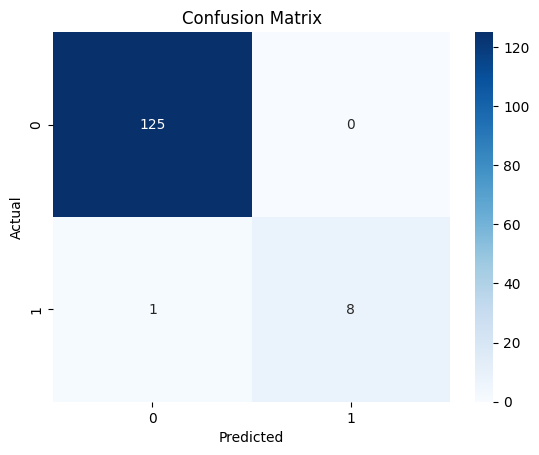

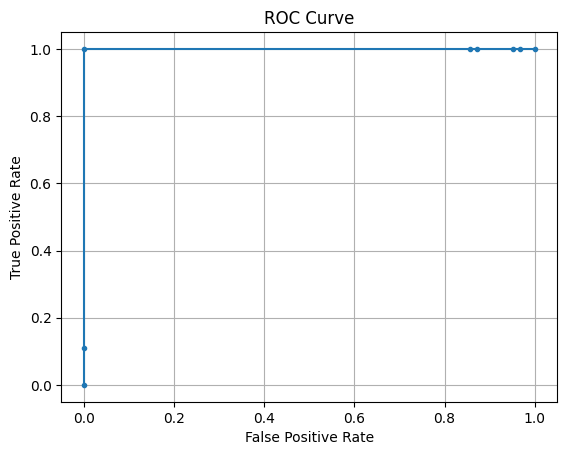


Updated dataset saved to filtered_erg_data_with_MDD.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = 'filtered_erg_data.csv'  # Update with the correct path
data = pd.read_csv(data_path)

# Display the first few rows to understand the data structure
print("Initial Data Overview:")
print(data.head())

# Check for missing values and the distribution of the target variable (MDD)
print("\nMissing Values Count:")
print(data.isnull().sum())

# Preprocessing: Handling missing values using imputation (mean strategy for numerical features)
imputer = SimpleImputer(strategy='mean')
numerical_features = ['a_time', 'a_amp', 'b_time', 'b_amp', 'OP_s_Amp', 'OP_s_Time', 'age']
data[numerical_features] = imputer.fit_transform(data[numerical_features])

# Encode 'sex' if it's categorical
if data['sex'].dtype == 'object':
    le = LabelEncoder()
    data['sex'] = le.fit_transform(data['sex'])

# Feature Scaling
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Define the target 'MDD' based on conditions that suggest Major Depressive Disorder
# Example conditions for MDD based on prolonged times and reduced amplitudes
data['MDD'] = np.where(
    ((data['a_time'] > 1) & (data['b_time'] > 1)) |
    ((data['OP_s_Time'] > 1) & (data['a_amp'] < -0.5)) |
    ((data['b_amp'] < -0.5) & (data['OP_s_Amp'] < -0.5)),
    1, 0
)

# Ensure both classes are present
print("\nMDD Class Distribution:")
print(data['MDD'].value_counts())

# Features and target
X = data[['a_time', 'a_amp', 'b_time', 'b_amp', 'OP_s_Amp', 'OP_s_Time', 'age', 'sex']]
y = data['MDD']

# Ensure there are at least some examples of each class before splitting
if len(data['MDD'].unique()) < 2:
    print("Not enough class diversity in the dataset for model training.")
else:
    # Train-test split with stratification to maintain class balance
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Check class distribution after split
    print("\nTraining Set MDD Class Distribution:")
    print(y_train.value_counts())

    # Initialize and train the Logistic Regression model
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Model evaluation
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, marker='.')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.show()

    # Save the updated dataset with MDD column
    updated_data_path = 'filtered_erg_data_with_MDD.csv'
    data.to_csv(updated_data_path, index=False)
    print(f"\nUpdated dataset saved to {updated_data_path}")


In [ ]:
import pandas as pd

# Load the dataset
data_path = 'filtered_erg_data_with_MDD.csv'  # Update with the correct file path
data = pd.read_csv(data_path)

# Check the first few rows to ensure the data is loaded correctly
print("Dataset Overview:")
print(data.head())

# Count the number of patients with and without MDD
mdd_counts = data['MDD'].value_counts()

# Display the counts
print("\nNumber of Patients with and without MDD:")
print(f"Without MDD (0): {mdd_counts.get(0, 0)}")
print(f"With MDD (1): {mdd_counts.get(1, 0)}")


Dataset Overview:
     a_time     a_amp    b_time     b_amp  OP_s_Amp     OP_s_Time       age  \
0 -0.594883  0.956358 -0.564438 -1.418968       0.0 -5.039782e-15  0.195155   
1 -0.627514  1.016564 -0.529883 -1.333605       0.0 -5.039782e-15  0.195155   
2  0.000000  0.000000 -0.659600 -0.744712       0.0 -5.039782e-15 -1.289804   
3  0.000000  0.000000 -0.659600 -0.744712       0.0 -5.039782e-15 -1.289804   
4  0.000000  0.000000 -0.659600 -0.902827       0.0 -5.039782e-15 -1.289804   

   sex  MDD  
0    0    0  
1    0    0  
2    1    0  
3    1    0  
4    1    0  

Number of Patients with and without MDD:
Without MDD (0): 623
With MDD (1): 43


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
data_path = 'filtered_erg_data_with_MDD.csv'  # Update with the correct path
data = pd.read_csv(data_path)

# Check the dataset structure
print("Dataset Overview:")
print(data.head())

# Handle missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
numerical_features = ['a_time', 'a_amp', 'b_time', 'b_amp', 'OP_s_Amp', 'OP_s_Time', 'age']
data[numerical_features] = imputer.fit_transform(data[numerical_features])

# Encode 'sex' if it is a categorical variable
if data['sex'].dtype == 'object':
    le = LabelEncoder()
    data['sex'] = le.fit_transform(data['sex'])

# Feature Scaling
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Define features and target
X = data[['a_time', 'a_amp', 'b_time', 'b_amp', 'OP_s_Amp', 'OP_s_Time', 'age', 'sex']]
y = data['MDD']

# Train-test split with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy score
print(f"\nAccuracy Score: {accuracy:.2f}")

# Additional model evaluation with classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Dataset Overview:
     a_time     a_amp    b_time     b_amp  OP_s_Amp     OP_s_Time       age  \
0 -0.594883  0.956358 -0.564438 -1.418968       0.0 -5.039782e-15  0.195155   
1 -0.627514  1.016564 -0.529883 -1.333605       0.0 -5.039782e-15  0.195155   
2  0.000000  0.000000 -0.659600 -0.744712       0.0 -5.039782e-15 -1.289804   
3  0.000000  0.000000 -0.659600 -0.744712       0.0 -5.039782e-15 -1.289804   
4  0.000000  0.000000 -0.659600 -0.902827       0.0 -5.039782e-15 -1.289804   

   sex  MDD  
0    0    0  
1    0    0  
2    1    0  
3    1    0  
4    1    0  

Accuracy Score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       125
           1       1.00      0.89      0.94         9

    accuracy                           0.99       134
   macro avg       1.00      0.94      0.97       134
weighted avg       0.99      0.99      0.99       134



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('filtered_erg_data.csv')

# Display the initial overview of data
print("Initial Data Overview:")
print(data.head())

# Handling missing values by imputing with mean for numerical columns
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Create target columns based on conditions interpreted from the image

# SAD Conditions
data_imputed['SAD'] = (
    ((data_imputed['b_amp'] < 10) & (data_imputed['OP_s_Time'] > 20)) |
    ((data_imputed['b_time'] > 30) & (data_imputed['age'] > 18))  # Considering age for adults
).astype(int)

# Schizophrenia (SZ) Conditions
data_imputed['SZ'] = (
    ((data_imputed['b_amp'] < 65) & (data_imputed['b_time'] > 30)) |
    ((data_imputed['a_amp'] < 10) & (data_imputed['age'] > 25))    # Lower a-wave amplitude and age condition
).astype(int)

# Bipolar Disorder (BD) Conditions
data_imputed['BD'] = (
    (data_imputed['b_amp'] < 65) & (data_imputed['age'] > 18) & (data_imputed['OP_s_Amp'] > 0)  # No specific anomaly
).astype(int)

# Autism Spectrum Disorders (ASD) Conditions
data_imputed['ASD'] = (
    (data_imputed['b_amp'] < 65) & (data_imputed['OP_s_Time'] > 20)  # Prolonged implicit time
).astype(int)

# Drug Addiction Conditions
data_imputed['Drug_Addiction'] = (
    (data_imputed['b_amp'] < 65) & (data_imputed['age'] > 18)        # Considering adult drug addiction
).astype(int)

# High Genetic Risk for Children for SZ or BD Conditions
data_imputed['High_Risk_SZ_BD'] = (
    (data_imputed['b_amp'] < 65) & (data_imputed['b_time'] > 30)     # For children with ERG anomalies
).astype(int)

# Select features and target columns for the ML model
features = ['a_time', 'a_amp', 'b_time', 'b_amp', 'OP_s_Amp', 'OP_s_Time', 'age', 'sex']
targets = ['SAD', 'SZ', 'BD', 'ASD', 'Drug_Addiction', 'High_Risk_SZ_BD']

# Prepare ML models for each target
results = {}
for target in targets:
    X = data_imputed[features]
    y = data_imputed[target]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest Model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    results[target] = {'Accuracy': accuracy, 'Report': report}

    print(f"\nResults for {target}:")
    print(f"Accuracy: {accuracy}")
    print(report)

# Save the modified dataset with target columns
data_imputed.to_csv('filtered_erg_data_with_targets.csv', index=False)


Initial Data Overview:
    a_time    a_amp     b_time    b_amp  OP_s_Amp  OP_s_Time   age  sex
0  11.3909 -5.23289  29.126900  16.7272       NaN        NaN  14.5    0
1  11.3463 -3.98402  29.985200  18.8737       NaN        NaN  14.5    0
2      NaN      NaN  26.763275  33.6818       NaN        NaN   5.0    1
3      NaN      NaN  26.763275  33.6818       NaN        NaN   5.0    1
4      NaN      NaN  26.763275  29.7059       NaN        NaN   5.0    1

Results for SAD:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00         8

    accuracy                           1.00       134
   macro avg       1.00      1.00      1.00       134
weighted avg       1.00      1.00      1.00       134


Results for SZ:
Accuracy: 0.9925373134328358
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       111
           1       1.00      0.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('filtered_erg_data.csv')

# Display the initial overview of data
print("Initial Data Overview:")
print(data.head())

# Handling missing values by imputing with mean for numerical columns
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Check if 'MDD' column exists, if not, create it using Logistic Regression
if 'MDD' not in data_imputed.columns:
    # Assuming 'MDD' should be predicted based on available features
    # For now, we'll create dummy 'MDD' using Logistic Regression

    # Let's assume we split the existing data based on some logic to create a pseudo-target 'MDD' column for training
    # Generate some random MDD values based on logical assumptions for this example
    data_imputed['MDD'] = ((data_imputed['b_amp'] < 25) & (data_imputed['a_time'] > 10)).astype(int)  # Example logic

    # Prepare features and target
    features = ['a_time', 'a_amp', 'b_time', 'b_amp', 'OP_s_Amp', 'OP_s_Time', 'age', 'sex']
    X_mdd = data_imputed[features]
    y_mdd = data_imputed['MDD']

    # Train-test split
    X_train_mdd, X_test_mdd, y_train_mdd, y_test_mdd = train_test_split(X_mdd, y_mdd, test_size=0.2, random_state=42)

    # Train the Logistic Regression model
    mdd_model = LogisticRegression(random_state=42)
    mdd_model.fit(X_train_mdd, y_train_mdd)

    # Predict MDD on the full imputed dataset
    data_imputed['MDD'] = mdd_model.predict(X_mdd)

# Create target columns based on conditions interpreted from the image

# SAD Conditions
data_imputed['SAD'] = (
    ((data_imputed['b_amp'] < 10) & (data_imputed['OP_s_Time'] > 20)) |
    ((data_imputed['b_time'] > 30) & (data_imputed['age'] > 18))  # Considering age for adults
).astype(int)

# Schizophrenia (SZ) Conditions
data_imputed['SZ'] = (
    ((data_imputed['b_amp'] < 65) & (data_imputed['b_time'] > 30)) |
    ((data_imputed['a_amp'] < 10) & (data_imputed['age'] > 25))    # Lower a-wave amplitude and age condition
).astype(int)

# Bipolar Disorder (BD) Conditions
data_imputed['BD'] = (
    (data_imputed['b_amp'] < 65) & (data_imputed['age'] > 18) & (data_imputed['OP_s_Amp'] > 0)  # No specific anomaly
).astype(int)

# Autism Spectrum Disorders (ASD) Conditions
data_imputed['ASD'] = (
    (data_imputed['b_amp'] < 65) & (data_imputed['OP_s_Time'] > 20)  # Prolonged implicit time
).astype(int)

# Drug Addiction Conditions
data_imputed['Drug_Addiction'] = (
    (data_imputed['b_amp'] < 65) & (data_imputed['age'] > 18)        # Considering adult drug addiction
).astype(int)

# High Genetic Risk for Children for SZ or BD Conditions
data_imputed['High_Risk_SZ_BD'] = (
    (data_imputed['b_amp'] < 65) & (data_imputed['b_time'] > 30)     # For children with ERG anomalies
).astype(int)

# Reorder columns to place 'MDD' after 'sex'
cols = data_imputed.columns.tolist()
mdd_index = cols.index('sex') + 1
cols.insert(mdd_index, cols.pop(cols.index('MDD')))  # Move 'MDD' after 'sex'
data_imputed = data_imputed[cols]

# Save the modified dataset with target columns
data_imputed.to_csv('filtered_erg_data_with_targets.csv', index=False)

print("Dataset saved with MDD and other target columns.")


Initial Data Overview:
    a_time    a_amp     b_time    b_amp  OP_s_Amp  OP_s_Time   age  sex
0  11.3909 -5.23289  29.126900  16.7272       NaN        NaN  14.5    0
1  11.3463 -3.98402  29.985200  18.8737       NaN        NaN  14.5    0
2      NaN      NaN  26.763275  33.6818       NaN        NaN   5.0    1
3      NaN      NaN  26.763275  33.6818       NaN        NaN   5.0    1
4      NaN      NaN  26.763275  29.7059       NaN        NaN   5.0    1
Dataset saved with MDD and other target columns.


#Data Visualization and Report:

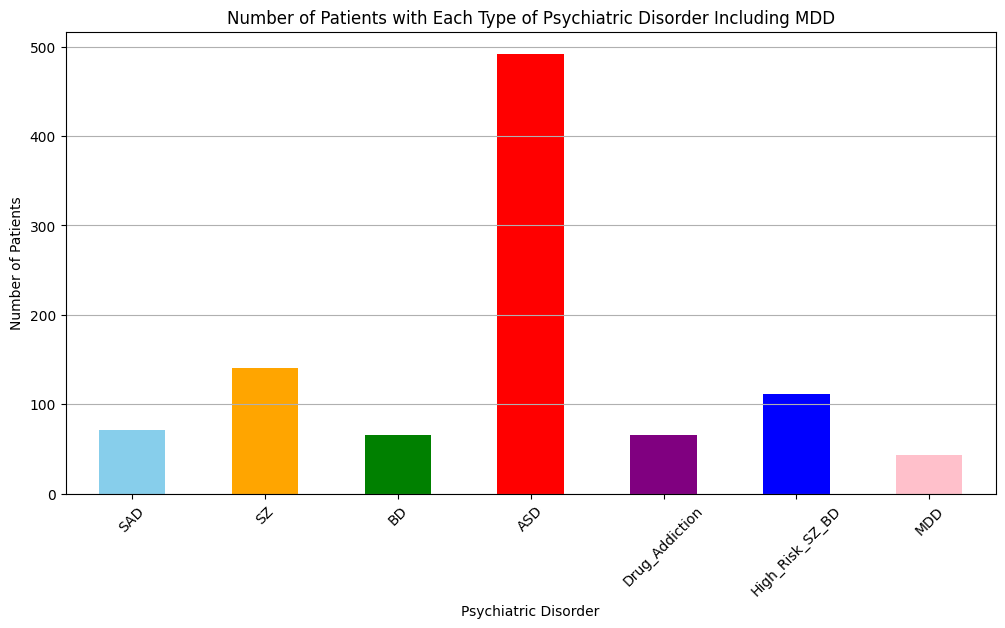

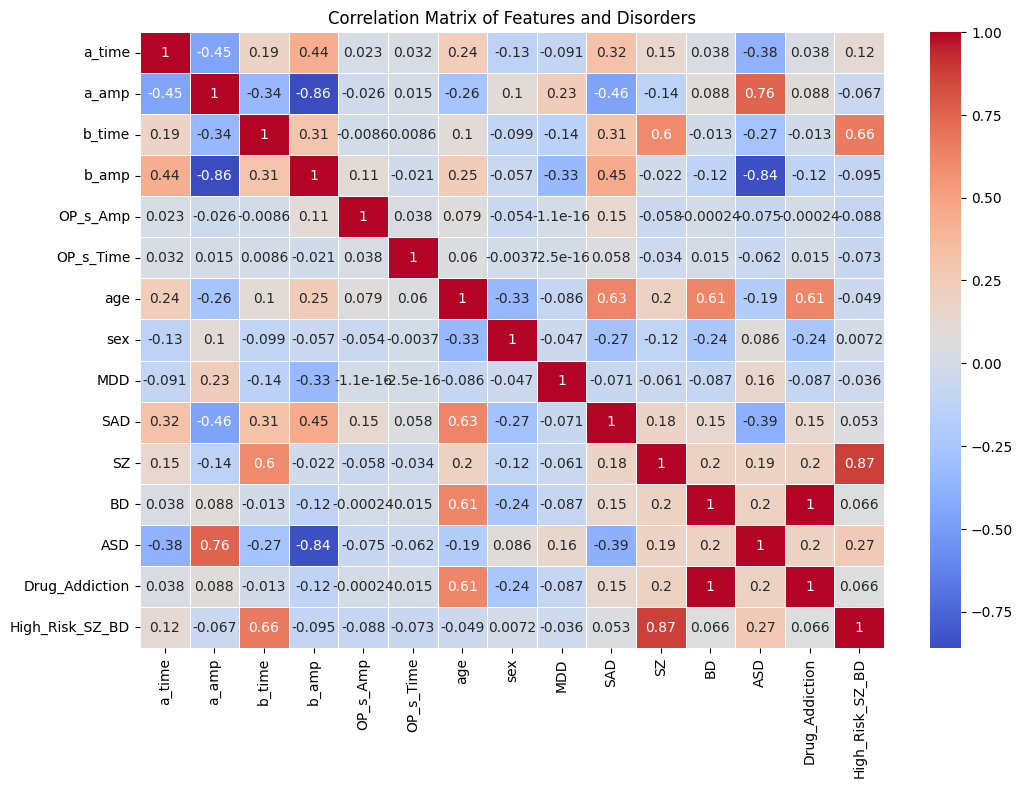

Overall Accuracy for predicting SAD: 1.00
Precision: 1.00
Recall: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00         8

    accuracy                           1.00       134
   macro avg       1.00      1.00      1.00       134
weighted avg       1.00      1.00      1.00       134



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

# Load the modified dataset with target columns
data = pd.read_csv('filtered_erg_data_with_targets.csv')

# 1. Data Visualization: Number of Patients with Each Type of Psychiatric Disorder
# Include MDD in the count
disorder_counts = data[['SAD', 'SZ', 'BD', 'ASD', 'Drug_Addiction', 'High_Risk_SZ_BD', 'MDD']].sum()

# Plot the number of patients with each type of disorder including MDD
plt.figure(figsize=(12, 6))
disorder_counts.plot(kind='bar', color=['skyblue', 'orange', 'green', 'red', 'purple', 'blue', 'pink'])
plt.title('Number of Patients with Each Type of Psychiatric Disorder Including MDD')
plt.xlabel('Psychiatric Disorder')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 2. Correlation Analysis
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features and Disorders')
plt.show()

# 3. Accuracy Calculation and Model Evaluation
# Example: Using RandomForest for 'SAD' target column
features = ['a_time', 'a_amp', 'b_time', 'b_amp', 'OP_s_Amp', 'OP_s_Time', 'age', 'sex']
target = 'SAD'

# Prepare features and target for the model
X = data[features]
y = data[target]

# Handle missing values by imputing with the mean for numerical columns
X = X.fillna(X.mean())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Print overall accuracy, precision, and recall
print(f"Overall Accuracy for predicting {target}: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 4. XY Graph: Scatter Plot of Two Features
# Example: Scatter plot of 'a_time' vs 'b_time'
plt.figure(figsize=(10, 6))
plt.scatter(data['a_time'], data['b_time'], c=data['SAD'], cmap='viridis', alpha=0.6)
plt.title('Scatter Plot of a_time vs b_time')
plt.xlabel('a_time')
plt.ylabel('b_time')
plt.colorbar(label='SAD (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()


#Testing with new custom inputs:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Load the modified dataset with target columns
data = pd.read_csv('filtered_erg_data_with_targets.csv')

# Define the features and targets for the ML model
features = ['a_time', 'a_amp', 'b_time', 'b_amp', 'OP_s_Amp', 'OP_s_Time', 'age', 'sex']
targets = ['SAD', 'SZ', 'BD', 'ASD', 'Drug_Addiction', 'High_Risk_SZ_BD', 'MDD']

# Prepare the data for model training
X = data[features]
X = X.fillna(X.mean())  # Handle missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Dictionary to store the trained models and accuracies for each disorder
models = {}
accuracies = {}

# Train a RandomForest model for each target column and calculate accuracies
for target in targets:
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the RandomForest model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    models[target] = model  # Store the trained model

    # Predictions on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    accuracies[target] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}

# Display the accuracies for each disorder
print("Accuracy Comparison Between Training and Testing Data:")
for disorder, accuracy in accuracies.items():
    print(f"\n{disorder}:")
    print(f"Training Accuracy: {accuracy['Train Accuracy']:.4f}")
    print(f"Testing Accuracy: {accuracy['Test Accuracy']:.4f}")

# Create 10 custom inputs for patients
custom_inputs = pd.DataFrame({
    'a_time': [12.5, 10.8, 11.7, 10.9, 13.1, 12.2, 11.0, 12.3, 11.6, 12.0],
    'a_amp': [-3.5, -4.1, -5.0, -3.2, -4.5, -5.2, -3.8, -4.3, -3.7, -4.8],
    'b_time': [28.5, 30.2, 27.8, 29.5, 31.1, 30.0, 29.0, 28.8, 30.4, 29.6],
    'b_amp': [18.5, 19.2, 20.1, 17.8, 19.7, 18.3, 19.5, 20.0, 17.5, 18.8],
    'OP_s_Amp': [10.2, 9.5, 8.8, 11.0, 10.5, 9.8, 8.9, 10.1, 9.6, 10.3],
    'OP_s_Time': [20.5, 21.0, 22.0, 19.5, 21.5, 22.5, 20.0, 19.8, 21.2, 20.7],
    'age': [20, 30, 25, 35, 40, 50, 45, 18, 60, 55],
    'sex': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
})

# Handle missing values in custom inputs by imputing with the mean
custom_inputs = pd.DataFrame(imputer.transform(custom_inputs), columns=custom_inputs.columns)

# Predict the disorder for each custom input using the trained models
predictions = {}
for target, model in models.items():
    predictions[target] = model.predict(custom_inputs)

# Combine the predictions into a single DataFrame
predictions_df = pd.DataFrame(predictions)
predictions_df['Patient_ID'] = range(1, len(predictions_df) + 1)

# Display the predicted output for each patient
print("\nPredicted Psychiatric Disorders for Custom Inputs:")
print(predictions_df)

# Save predictions to a CSV file if needed
predictions_df.to_csv('predicted_disorders_for_custom_inputs.csv', index=False)


Accuracy Comparison Between Training and Testing Data:

SAD:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000

SZ:
Training Accuracy: 1.0000
Testing Accuracy: 0.9925

BD:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000

ASD:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000

Drug_Addiction:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000

High_Risk_SZ_BD:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000

MDD:
Training Accuracy: 1.0000
Testing Accuracy: 0.9851

Predicted Psychiatric Disorders for Custom Inputs:
   SAD  SZ  BD  ASD  Drug_Addiction  High_Risk_SZ_BD  MDD  Patient_ID
0    0   0   1    1               1                0    1           1
1    0   1   1    1               1                1    1           2
2    0   1   1    1               1                0    1           3
3    0   1   1    1               1                0    1           4
4    0   1   1    1               1                1    1           5
5    0   1   1    1               1                1 